In [2]:
from utils.CO_utils import *
from utils.OD_utils import *
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import os

In [119]:
num_nodes, kappa, iterations = 50, 5, 50
states = np.random.randint(0, kappa, num_nodes)
G1 = nx.barabasi_albert_graph(num_nodes, 12, seed=43)

sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
plt.rcParams['font.family'] = 'sans-serif'

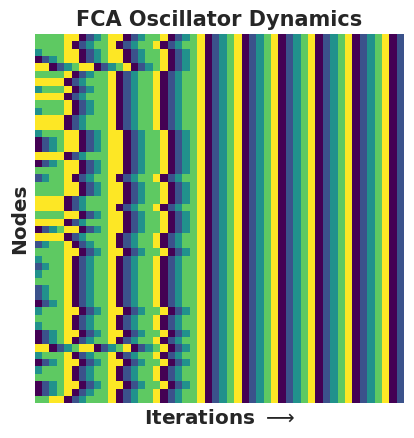

In [191]:
dynamics, label = FCA(G1, states, kappa, iterations)
s = sns.heatmap(dynamics.T, xticklabels=False, yticklabels=False, cbar = False, square=True, cmap="viridis")
s.set_xlabel(r"Iterations $\longrightarrow$", fontweight="bold")
s.set_ylabel(r"Nodes", fontweight="bold")
s.set_title("FCA Oscillator Dynamics", fontsize=15, fontweight="bold");

100%|██████████| 49/49 [00:00<00:00, 379.09it/s]


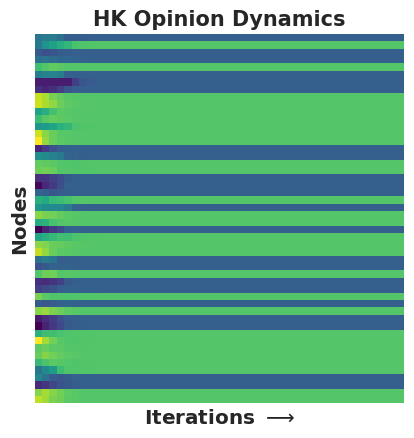

In [189]:
s_opinion = np.random.rand(num_nodes)
dynamics = hk_local(nx.adjacency_matrix(G1).todense(), s_opinion, 0.23, 49, conv_stop=False)
s2 = sns.heatmap(dynamics.T, xticklabels=False, yticklabels=False, cbar = False, square=True, cmap="viridis")
s2.set_xlabel(r"Iterations $\longrightarrow$", fontweight="bold")
s2.set_ylabel(r"Nodes", fontweight="bold")
s2.set_title(r"HK Opinion Dynamics", fontsize=15, fontweight="bold");

Text(0.5, 1.0, 'Adjacency Matrix')

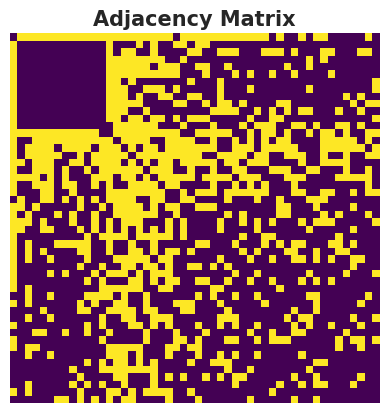

In [118]:
s3 = sns.heatmap(nx.adjacency_matrix(G1).todense(), xticklabels=False, yticklabels=False, cbar = False, square=True, cmap="viridis")
s3.set_title("Adjacency Matrix", fontsize=15, fontweight="bold")

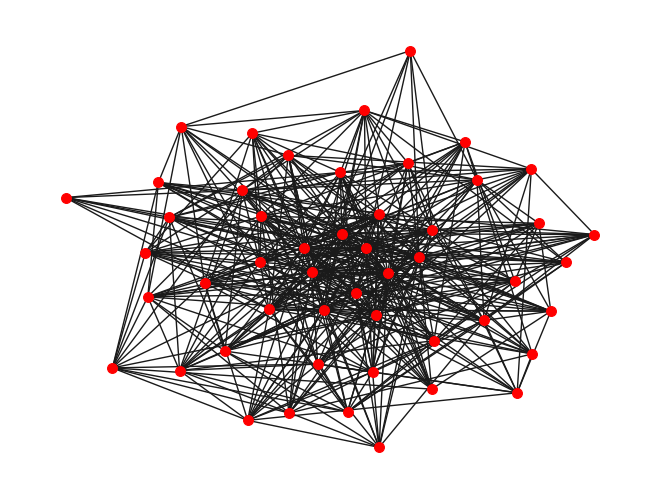

In [135]:
nx.draw_spring(G1, node_size=50, node_color="red")

In [ ]:
num_nodes, kappa, iterations = 50, 5, 50
states = np.random.randint(0, kappa, num_nodes)
G1 = nx.barabasi_albert_graph(num_nodes, 12, seed=43)


dynamics, label = FCA(G1, states, kappa, iterations)
s = sns.heatmap(dynamics.T, xticklabels=False, yticklabels=False, cbar = False, square=True, cmap="viridis")
s.set_xlabel(r"Iterations $\longrightarrow$", fontweight="bold")
s.set_ylabel(r"Nodes", fontweight="bold")
s.set_title("FCA Oscillator Dynamics", fontsize=15, fontweight="bold");

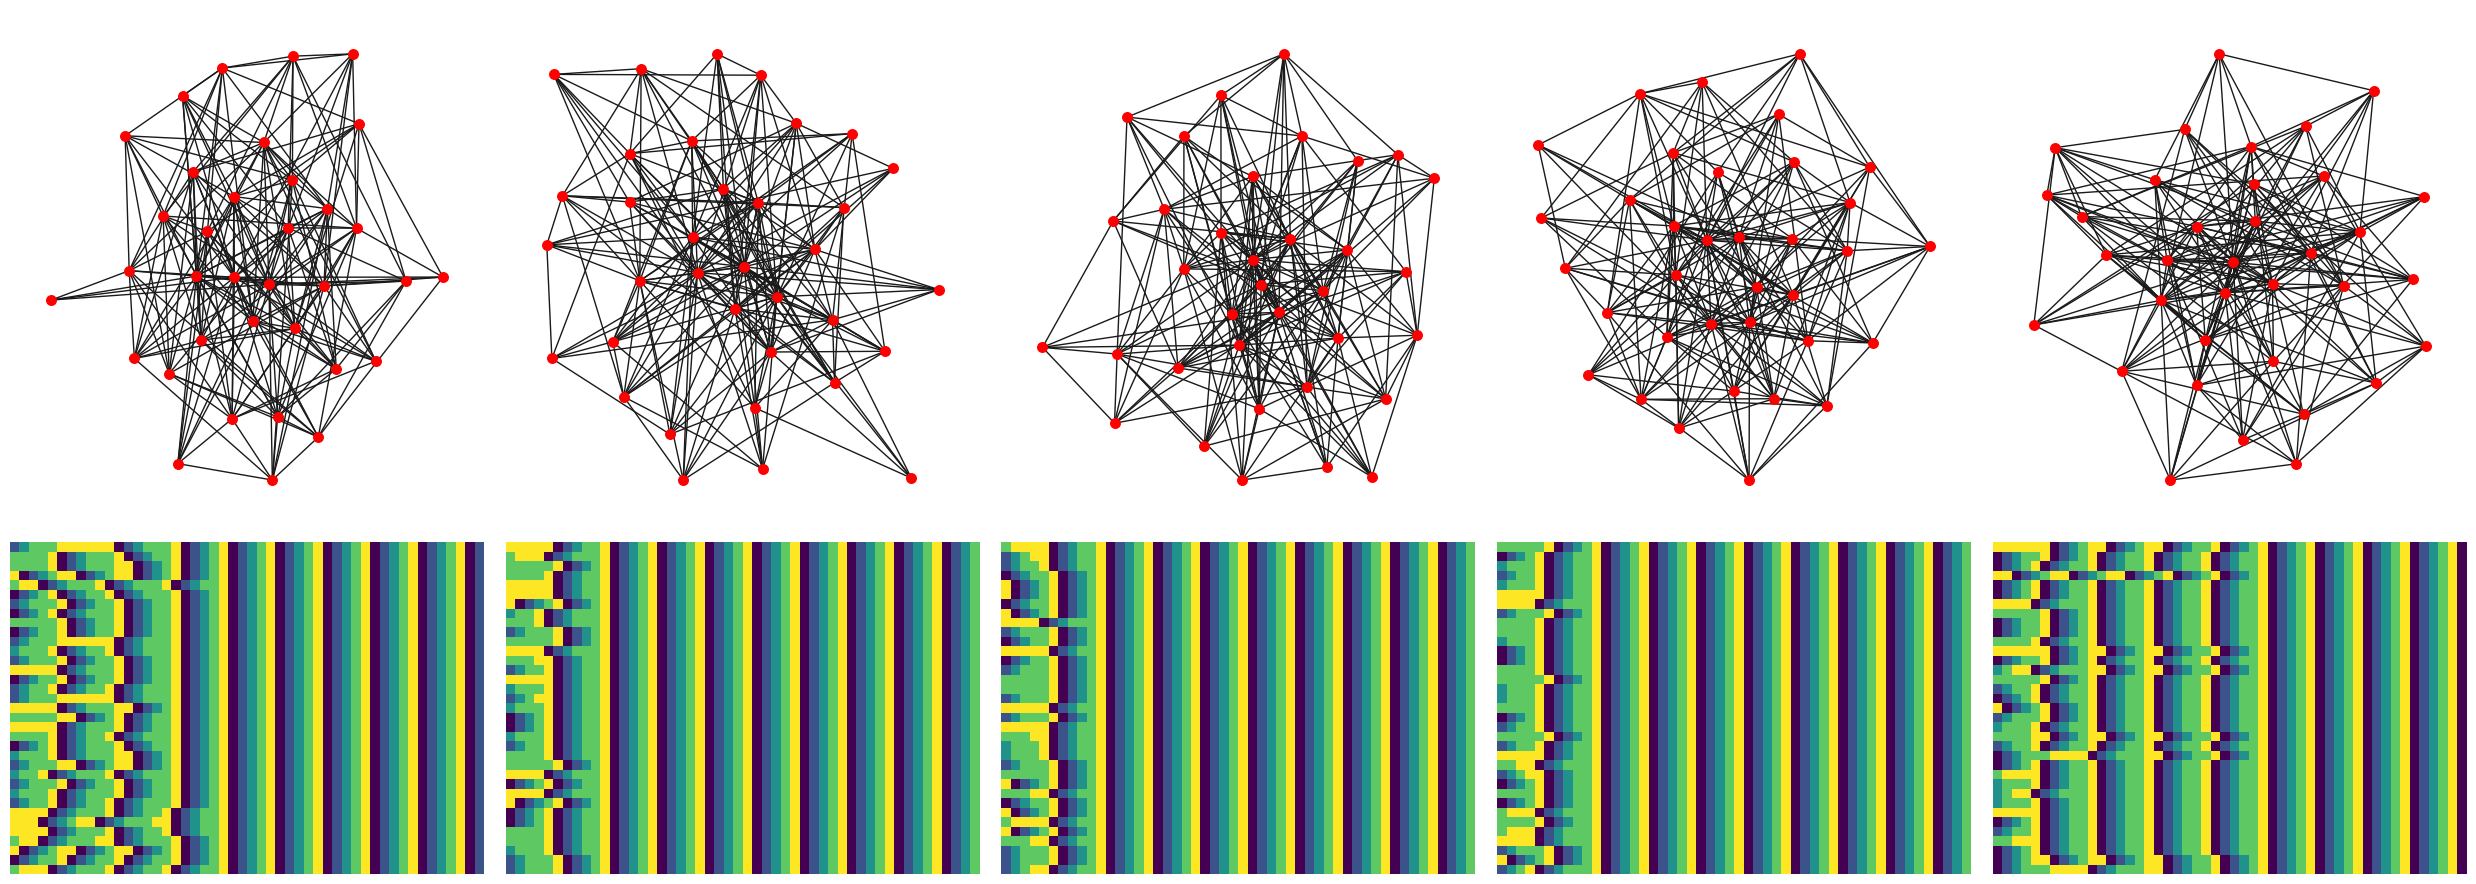

In [212]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
plt.rcParams['font.family'] = 'sans-serif'

# Block 1
def generate_graph_and_states(num_nodes=35, kappa=5):
    states = np.random.randint(0, kappa, num_nodes)
    G = nx.barabasi_albert_graph(num_nodes, 8)
    return G, states

# Create a 2x5 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10), gridspec_kw={'height_ratios': [1, 1]})

for col in range(5):
    # Generate a graph and states for the current column
    G, states = generate_graph_and_states()

    # Plot the graph in the top row of the current column
    nx.draw_spring(G, ax=axes[0, col], with_labels=False, node_size=50, node_color="red")
    # Calculate dynamics and label using FCA (replace with your actual FCA function)
    dynamics, label = FCA(G, states, 5, 50)

    # Plot the heatmap in the bottom row of the current column
    sns.heatmap(dynamics.T, ax=axes[1, col], xticklabels=False, yticklabels=False, cbar=False, square=True, cmap="viridis")

# Adjust layout to prevent overlapping
plt.subplots_adjust(wspace=0.9)
plt.tight_layout()
plt.show()


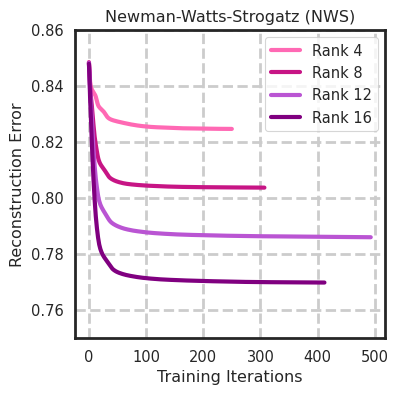

In [60]:
with open(os.path.join("/home/agoyal25/NCPD-Dynamics/data/Model_FCA_Network_NWS_SampleK_25_ParentNodes_450_NumSamples_2500_Seed_0/reconstruction_error.pkl"), "rb") as f:
    rec_errors = pickle.load(f)

rank4_err, rank8_err, rank12_err, rank16_err = rec_errors[0], rec_errors[1], rec_errors[2], rec_errors[3]

sns.set_style('white')
sns.set_context("paper", font_scale = 1.2)
plt.rcParams['font.family'] = 'sans-serif'

plt.figure(figsize=(4,4))
plt.plot(rank4_err, linewidth=3, color="hotpink", label="Rank 4")
plt.plot(rank8_err, linewidth=3, color="mediumvioletred", label="Rank 8")
plt.plot(rank12_err, linewidth=3, color="mediumorchid", label="Rank 12")
plt.plot(rank16_err, linewidth=3, color="purple", label="Rank 16")
plt.ylim(0.75, 0.86)
plt.grid(linestyle="--", linewidth=2)
plt.xlabel("Training Iterations")
plt.ylabel("Reconstruction Error")
ax = plt.gca()  # Get current axes
for spine in ax.spines.values():
    spine.set_linewidth(2)
plt.title("Newman-Watts-Strogatz (NWS)")
plt.legend();

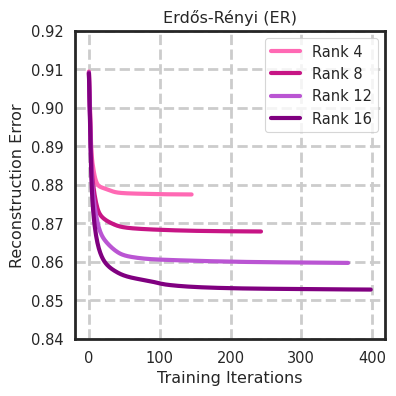

In [61]:
with open(os.path.join("/home/agoyal25/NCPD-Dynamics/data/Model_FCA_Network_ER_SampleK_25_ParentNodes_450_NumSamples_2500_Seed_0/reconstruction_error.pkl"), "rb") as f:
    rec_errors = pickle.load(f)

rank4_err, rank8_err, rank12_err, rank16_err = rec_errors[0], rec_errors[1], rec_errors[2], rec_errors[3]

sns.set_style('white')
sns.set_context("paper", font_scale = 1.2)
plt.rcParams['font.family'] = 'sans-serif'

plt.figure(figsize=(4,4))
plt.plot(rank4_err, linewidth=3, color="hotpink", label="Rank 4")
plt.plot(rank8_err, linewidth=3, color="mediumvioletred", label="Rank 8")
plt.plot(rank12_err, linewidth=3, color="mediumorchid", label="Rank 12")
plt.plot(rank16_err, linewidth=3, color="purple", label="Rank 16")
plt.ylim(0.84, 0.92)
plt.grid(linestyle="--", linewidth=2)
plt.xlabel("Training Iterations")
plt.ylabel("Reconstruction Error")
ax = plt.gca()  # Get current axes
for spine in ax.spines.values():
    spine.set_linewidth(2)
plt.title("Erdős-Rényi (ER)")
plt.legend();

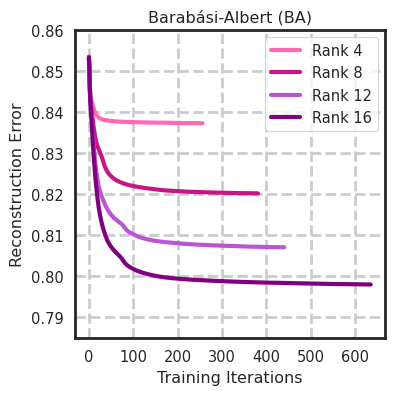

In [59]:
with open(os.path.join("/home/agoyal25/NCPD-Dynamics/data/Model_FCA_Network_BA_SampleK_25_ParentNodes_450_NumSamples_2500_Seed_0/reconstruction_error.pkl"), "rb") as f:
    rec_errors = pickle.load(f)

rank4_err, rank8_err, rank12_err, rank16_err = rec_errors[0], rec_errors[1], rec_errors[2], rec_errors[3]

sns.set_style('white')
sns.set_context("paper", font_scale = 1.2)
plt.rcParams['font.family'] = 'sans-serif'

plt.figure(figsize=(4,4))
plt.plot(rank4_err, linewidth=3, color="hotpink", label="Rank 4")
plt.plot(rank8_err, linewidth=3, color="mediumvioletred", label="Rank 8")
plt.plot(rank12_err, linewidth=3, color="mediumorchid", label="Rank 12")
plt.plot(rank16_err, linewidth=3, color="purple", label="Rank 16")
plt.ylim(0.785, 0.86)
plt.grid(linestyle="--", linewidth=2)
plt.xlabel("Training Iterations")
plt.ylabel("Reconstruction Error")
ax = plt.gca()  # Get current axes
for spine in ax.spines.values():
    spine.set_linewidth(2)
plt.title("Barabási-Albert (BA)")
plt.legend();

In [66]:
with open(os.path.join("/home/agoyal25/NCPD-Dynamics/data/Model_FCA_Network_BA_SampleK_10_ParentNodes_450_NumSamples_2500_Seed_0/reconstruction_error.pkl"), "rb") as f:
    ba_10 = pickle.load(f)
ba_10_rank4_err, ba_10_rank8_err, ba_10_rank12_err, ba_10_rank16_err = ba_10[0][-1], ba_10[1][-1], ba_10[2][-1], ba_10[3][-1]

with open(os.path.join("/home/agoyal25/NCPD-Dynamics/data/Model_FCA_Network_NWS_SampleK_10_ParentNodes_450_NumSamples_2500_Seed_0/reconstruction_error.pkl"), "rb") as f:
    nws_10 = pickle.load(f)
nws_10_rank4_err, nws_10_rank8_err, nws_10_rank12_err, nws_10_rank16_err = nws_10[0][-1], nws_10[1][-1], nws_10[2][-1], nws_10[3][-1]

with open(os.path.join("/home/agoyal25/NCPD-Dynamics/data/Model_FCA_Network_ER_SampleK_10_ParentNodes_450_NumSamples_2500_Seed_0/reconstruction_error.pkl"), "rb") as f:
    er_10 = pickle.load(f)
er_10_rank4_err, er_10_rank8_err, er_10_rank12_err, er_10_rank16_err = er_10[0][-1], er_10[1][-1], er_10[2][-1], er_10[3][-1]

with open(os.path.join("/home/agoyal25/NCPD-Dynamics/data/Model_FCA_Network_BA_SampleK_25_ParentNodes_450_NumSamples_2500_Seed_0/reconstruction_error.pkl"), "rb") as f:
    ba_25 = pickle.load(f)
ba_25_rank4_err, ba_25_rank8_err, ba_25_rank12_err, ba_25_rank16_err = ba_25[0][-1], ba_25[1][-1], ba_25[2][-1], ba_25[3][-1]

with open(os.path.join("/home/agoyal25/NCPD-Dynamics/data/Model_FCA_Network_NWS_SampleK_25_ParentNodes_450_NumSamples_2500_Seed_0/reconstruction_error.pkl"), "rb") as f:
    nws_25 = pickle.load(f)
nws_25_rank4_err, nws_25_rank8_err, nws_25_rank12_err, nws_25_rank16_err = nws_25[0][-1], nws_25[1][-1], nws_25[2][-1], nws_25[3][-1]

with open(os.path.join("/home/agoyal25/NCPD-Dynamics/data/Model_FCA_Network_ER_SampleK_25_ParentNodes_450_NumSamples_2500_Seed_0/reconstruction_error.pkl"), "rb") as f:
    er_25 = pickle.load(f)
er_25_rank4_err, er_25_rank8_err, er_25_rank12_err, er_25_rank16_err = er_25[0][-1], er_25[1][-1], er_25[2][-1], er_25[3][-1]

with open(os.path.join("/home/agoyal25/NCPD-Dynamics/data/Model_FCA_Network_BA_SampleK_35_ParentNodes_450_NumSamples_2500_Seed_0/reconstruction_error.pkl"), "rb") as f:
    ba_35 = pickle.load(f)
ba_35_rank4_err, ba_35_rank8_err, ba_35_rank12_err, ba_35_rank16_err = ba_35[0][-1], ba_35[1][-1], ba_35[2][-1], ba_35[3][-1]

with open(os.path.join("/home/agoyal25/NCPD-Dynamics/data/Model_FCA_Network_NWS_SampleK_35_ParentNodes_450_NumSamples_2500_Seed_0/reconstruction_error.pkl"), "rb") as f:
    nws_35 = pickle.load(f)
nws_35_rank4_err, nws_35_rank8_err, nws_35_rank12_err, nws_35_rank16_err = nws_35[0][-1], nws_35[1][-1], nws_35[2][-1], nws_35[3][-1]

with open(os.path.join("/home/agoyal25/NCPD-Dynamics/data/Model_FCA_Network_ER_SampleK_35_ParentNodes_450_NumSamples_2500_Seed_0/reconstruction_error.pkl"), "rb") as f:
    er_35 = pickle.load(f)
er_35_rank4_err, er_35_rank8_err, er_35_rank12_err, er_35_rank16_err = er_35[0][-1], er_35[1][-1], er_35[2][-1], er_35[3][-1]


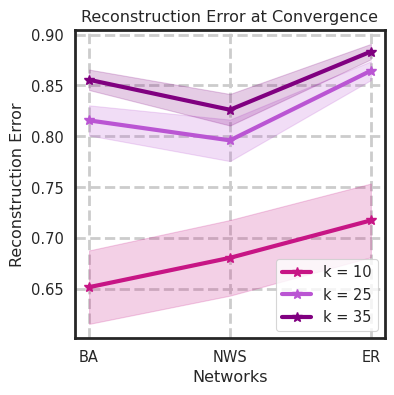

In [93]:
ba_10_std = np.std([ba_10_rank4_err, ba_10_rank8_err, ba_10_rank12_err, ba_10_rank16_err])
nws_10_std = np.std([nws_10_rank4_err, nws_10_rank8_err, nws_10_rank12_err, nws_10_rank16_err])
er_10_std = np.std([er_10_rank4_err, er_10_rank8_err, er_10_rank12_err, er_10_rank16_err])

plt.figure(figsize=(4,4))
plt.plot([np.mean([ba_10_rank4_err, ba_10_rank8_err, ba_10_rank12_err, ba_10_rank16_err]), 
          np.mean([nws_10_rank4_err, nws_10_rank8_err, nws_10_rank12_err, nws_10_rank16_err]), 
          np.mean([er_10_rank4_err, er_10_rank8_err, er_10_rank12_err, er_10_rank16_err])
          ], 
          linewidth=3, color="mediumvioletred", label="k = 10", marker="*", markersize="7",)

plt.fill_between([0, 1, 2],
                 [np.mean([ba_10_rank4_err, ba_10_rank8_err, ba_10_rank12_err, ba_10_rank16_err]) - ba_10_std,
                  np.mean([nws_10_rank4_err, nws_10_rank8_err, nws_10_rank12_err, nws_10_rank16_err]) - nws_10_std,
                  np.mean([er_10_rank4_err, er_10_rank8_err, er_10_rank12_err, er_10_rank16_err]) - er_10_std
                  ],
                 [np.mean([ba_10_rank4_err, ba_10_rank8_err, ba_10_rank12_err, ba_10_rank16_err]) + ba_10_std,
                  np.mean([nws_10_rank4_err, nws_10_rank8_err, nws_10_rank12_err, nws_10_rank16_err]) + nws_10_std,
                  np.mean([er_10_rank4_err, er_10_rank8_err, er_10_rank12_err, er_10_rank16_err]) + er_10_std
                  ],
                 color="mediumvioletred", alpha=0.2)

ba_25_std = np.std([ba_25_rank4_err, ba_25_rank8_err, ba_25_rank12_err, ba_25_rank16_err])
nws_25_std = np.std([nws_25_rank4_err, nws_25_rank8_err, nws_25_rank12_err, nws_25_rank16_err])
er_25_std = np.std([er_25_rank4_err, er_25_rank8_err, er_25_rank12_err, er_25_rank16_err])

plt.plot([np.mean([ba_25_rank4_err, ba_25_rank8_err, ba_25_rank12_err, ba_25_rank16_err]), 
          np.mean([nws_25_rank4_err, nws_25_rank8_err, nws_25_rank12_err, nws_25_rank16_err]), 
          np.mean([er_25_rank4_err, er_25_rank8_err, er_25_rank12_err, er_25_rank16_err])
          ], 
          linewidth=3, color="mediumorchid", label="k = 25", marker="*", markersize="7",)

plt.fill_between([0, 1, 2],
                 [np.mean([ba_25_rank4_err, ba_25_rank8_err, ba_25_rank12_err, ba_25_rank16_err]) - ba_25_std,
                  np.mean([nws_25_rank4_err, nws_25_rank8_err, nws_25_rank12_err, nws_25_rank16_err]) - nws_25_std,
                  np.mean([er_25_rank4_err, er_25_rank8_err, er_25_rank12_err, er_25_rank16_err]) - er_25_std
                  ],
                 [np.mean([ba_25_rank4_err, ba_25_rank8_err, ba_25_rank12_err, ba_25_rank16_err]) + ba_25_std,
                  np.mean([nws_25_rank4_err, nws_25_rank8_err, nws_25_rank12_err, nws_25_rank16_err]) + nws_25_std,
                  np.mean([er_25_rank4_err, er_25_rank8_err, er_25_rank12_err, er_25_rank16_err]) + er_25_std
                  ],
                 color="mediumorchid", alpha=0.2)

ba_35_std = np.std([ba_35_rank4_err, ba_35_rank8_err, ba_35_rank12_err, ba_35_rank16_err])
nws_35_std = np.std([nws_35_rank4_err, nws_35_rank8_err, nws_35_rank12_err, nws_35_rank16_err])
er_35_std = np.std([er_35_rank4_err, er_35_rank8_err, er_35_rank12_err, er_35_rank16_err])

plt.plot([np.mean([ba_35_rank4_err, ba_35_rank8_err, ba_35_rank12_err, ba_35_rank16_err]), 
          np.mean([nws_35_rank4_err, nws_35_rank8_err, nws_35_rank12_err, nws_35_rank16_err]), 
          np.mean([er_35_rank4_err, er_35_rank8_err, er_35_rank12_err, er_35_rank16_err])
          ], 
          linewidth=3, color="purple", label="k = 35", marker="*", markersize="7",)

plt.fill_between([0, 1, 2],
                 [np.mean([ba_35_rank4_err, ba_35_rank8_err, ba_35_rank12_err, ba_35_rank16_err]) - ba_35_std,
                  np.mean([nws_35_rank4_err, nws_35_rank8_err, nws_35_rank12_err, nws_35_rank16_err]) - nws_35_std,
                  np.mean([er_35_rank4_err, er_35_rank8_err, er_35_rank12_err, er_35_rank16_err]) - er_35_std
                  ],
                 [np.mean([ba_35_rank4_err, ba_35_rank8_err, ba_35_rank12_err, ba_35_rank16_err]) + ba_35_std,
                  np.mean([nws_35_rank4_err, nws_35_rank8_err, nws_35_rank12_err, nws_35_rank16_err]) + nws_35_std,
                  np.mean([er_35_rank4_err, er_35_rank8_err, er_35_rank12_err, er_35_rank16_err]) + er_35_std
                  ],
                 color="purple", alpha=0.2)


plt.xticks([0, 1, 2], labels=["BA", "NWS", "ER"])
plt.legend()
plt.grid(linestyle="--", linewidth=2)
plt.xlabel("Networks")
plt.ylabel("Reconstruction Error")
ax = plt.gca()  # Get current axes
for spine in ax.spines.values():
    spine.set_linewidth(2)
plt.title("Reconstruction Error at Convergence")
plt.legend();

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.2)
plt.rcParams['font.family'] = 'sans-serif'

plt.figure(figsize=(4,4))
plt.plot(rank4_err, linewidth=3, color="hotpink", label="Rank 4")
plt.plot(rank8_err, linewidth=3, color="mediumvioletred", label="Rank 8")
plt.plot(rank12_err, linewidth=3, color="mediumorchid", label="Rank 12")
plt.plot(rank16_err, linewidth=3, color="purple", label="Rank 16")
# plt.ylim(0.785, 0.86)
plt.grid(linestyle="--", linewidth=2)
plt.xlabel("Training Iterations")
plt.ylabel("Reconstruction Error")
ax = plt.gca()  # Get current axes
for spine in ax.spines.values():
    spine.set_linewidth(2)
plt.title("Barabási-Albert (BA)")
plt.legend();

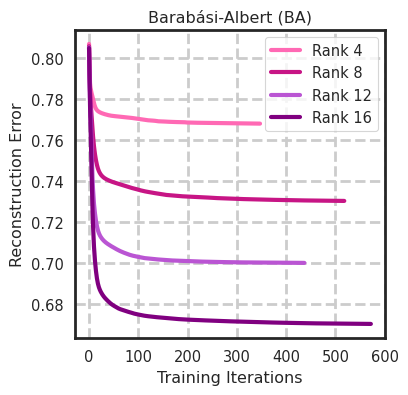

In [64]:
with open(os.path.join("/home/agoyal25/NCPD-Dynamics/data/Model_FCA_Network_ER_SampleK_10_ParentNodes_450_NumSamples_2500_Seed_0/reconstruction_error.pkl"), "rb") as f:
    rec_errors = pickle.load(f)

rank4_err, rank8_err, rank12_err, rank16_err = rec_errors[0], rec_errors[1], rec_errors[2], rec_errors[3]

sns.set_style('white')
sns.set_context("paper", font_scale = 1.2)
plt.rcParams['font.family'] = 'sans-serif'

plt.figure(figsize=(4,4))
plt.plot(rank4_err, linewidth=3, color="hotpink", label="Rank 4")
plt.plot(rank8_err, linewidth=3, color="mediumvioletred", label="Rank 8")
plt.plot(rank12_err, linewidth=3, color="mediumorchid", label="Rank 12")
plt.plot(rank16_err, linewidth=3, color="purple", label="Rank 16")
# plt.ylim(0.785, 0.86)
plt.grid(linestyle="--", linewidth=2)
plt.xlabel("Training Iterations")
plt.ylabel("Reconstruction Error")
ax = plt.gca()  # Get current axes
for spine in ax.spines.values():
    spine.set_linewidth(2)
plt.title("Barabási-Albert (BA)")
plt.legend();

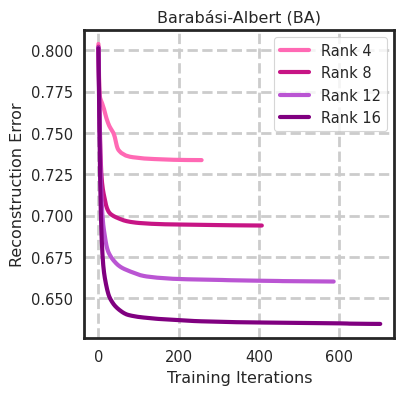

In [65]:
with open(os.path.join("/home/agoyal25/NCPD-Dynamics/data/Model_FCA_Network_NWS_SampleK_10_ParentNodes_450_NumSamples_2500_Seed_0/reconstruction_error.pkl"), "rb") as f:
    rec_errors = pickle.load(f)

rank4_err, rank8_err, rank12_err, rank16_err = rec_errors[0], rec_errors[1], rec_errors[2], rec_errors[3]

sns.set_style('white')
sns.set_context("paper", font_scale = 1.2)
plt.rcParams['font.family'] = 'sans-serif'

plt.figure(figsize=(4,4))
plt.plot(rank4_err, linewidth=3, color="hotpink", label="Rank 4")
plt.plot(rank8_err, linewidth=3, color="mediumvioletred", label="Rank 8")
plt.plot(rank12_err, linewidth=3, color="mediumorchid", label="Rank 12")
plt.plot(rank16_err, linewidth=3, color="purple", label="Rank 16")
# plt.ylim(0.785, 0.86)
plt.grid(linestyle="--", linewidth=2)
plt.xlabel("Training Iterations")
plt.ylabel("Reconstruction Error")
ax = plt.gca()  # Get current axes
for spine in ax.spines.values():
    spine.set_linewidth(2)
plt.title("Barabási-Albert (BA)")
plt.legend();